In [1]:
# import basic modules
import os, sys

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from C_to_U_classifier_plus_min import utils
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# define input paths for iForest prediction on basecalling features

wt_dfCTaggr_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/wt.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"
ko_dfCTaggr_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/ko.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"

ref_filepath = "/lustre/bio_running/C_to_U_editing/refs/GRCm39.genome.fa"

ed_pos_filepath = "/lustre/bio_running/C_to_U_editing/merged_mm39.tsv"
ed_pos_columns_filepath = "/lustre/bio_running/C_to_U_editing/merged_mm39_columns.txt"

In [3]:
# open wt, ko and illumina ground truth table
with open(ed_pos_columns_filepath) as columns:
    ed_pos = pd.read_table(ed_pos_filepath, header=None)
    ed_pos.columns = [i.rstrip() for i in columns.readlines()]
ed_pos

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915683,chr1,4845460,C,1,290,35.40,"[0, 258, 0, 32]",CT,0.11,184,35.08,"[0, 184, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,chr1,4845471,C,1,290,35.45,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915851,chr1,4845628,C,1,142,35.19,"[0, 135, 0, 7]",CT,0.05,83,35.00,"[0, 83, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,chr1,4846161,C,1,183,35.79,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4967044,chr1,4896821,C,1,439,35.51,"[0, 404, 0, 35]",CT,0.08,325,35.56,"[0, 325, 0, 0]",-,0.0,UTR3,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,chrX,167346485,C,0,125,35.35,"[0, 119, 0, 6]",CT,0.05,86,35.72,"[0, 86, 0, 0]",-,0.0,UTR3,Prps2
683,chrX,166130959,chrX,167347963,C,0,70,35.71,"[0, 66, 0, 4]",CT,0.06,70,35.58,"[0, 70, 0, 0]",-,0.0,UTR3,Prps2
684,chrX,166131073,chrX,167348077,C,0,116,35.45,"[0, 110, 0, 6]",CT,0.05,128,35.77,"[0, 128, 0, 0]",-,0.0,UTR3,Prps2
685,chrX,166131296,chrX,167348300,C,0,133,35.46,"[0, 120, 0, 13]",CT,0.10,102,35.44,"[0, 102, 0, 0]",-,0.0,UTR3,Prps2


In [4]:
wt_dfCTaggr = pd.read_table(wt_dfCTaggr_filepath)
# produce prediction
wt_dfCTaggr = wt_dfCTaggr.query("depth_stranded > 50")
wt_dfCTaggr = utils.predict_editing_custom_thrs(wt_dfCTaggr, 
                                                "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1_cc2_merged.iforest.freq_thresholds.tsv",
                                                ref_filepath,
                                                0.02)
wt_dfCTaggr.columns = wt_dfCTaggr.columns[:3].tolist() + ["WT_T_native", "WT_T_iForest", "WT_depth_stranded", "WT_Tfreq_native", "WT_Tfreq_iForest", "WT_5mer", "WT_y_iForest"]
wt_dfCTaggr

100%|██████████| 382443/382443 [00:52<00:00, 7261.31it/s] 


,region,position,strand,WT_T_native,WT_T_iForest,WT_depth_stranded,WT_Tfreq_native,WT_Tfreq_iForest,WT_5mer,WT_y_iForest
0,chr1,4846611,-,2,0,100,0.020000,0.0,GTCTG,0
1,chr1,4846619,-,1,0,101,0.009901,0.0,AGCTT,0
2,chr1,4846635,-,5,0,77,0.064935,0.0,TTCTT,0
3,chr1,4846643,-,3,0,103,0.029126,0.0,CACAT,0
4,chr1,4846645,-,3,0,103,0.029126,0.0,TGCAC,0
...,...,...,...,...,...,...,...,...,...,...
389965,chrY,90804626,+,2,0,66,0.030303,0.0,AGCGG,0
389966,chrY,90804632,+,1,0,67,0.014925,0.0,CGCCG,0
389967,chrY,90804649,+,1,0,58,0.017241,0.0,CTCTG,0
389968,chrY,90804680,+,2,0,60,0.033333,0.0,CTCCA,0


In [5]:
wt_dfCTaggr.WT_y_iForest.value_counts()

0    365041
1     17402
Name: WT_y_iForest, dtype: int64

In [6]:
ko_dfCTaggr = pd.read_table(ko_dfCTaggr_filepath)
# drop positions with coverage lower than 50
ko_dfCTaggr = ko_dfCTaggr.query("depth_stranded > 50")
ko_dfCTaggr = utils.predict_editing_custom_thrs(ko_dfCTaggr, 
                                                "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1/cc1.iforest.freq_thresholds.tsv",
                                                ref_filepath,
                                                0.02)
ko_dfCTaggr.columns = ko_dfCTaggr.columns[:3].tolist() + ["KO_T_native", "KO_T_iForest", "KO_depth_stranded", "KO_Tfreq_native", "KO_Tfreq_iForest", "KO_5mer", "KO_y_iForest"]
ko_dfCTaggr

100%|██████████| 518188/518188 [00:51<00:00, 10080.52it/s]


,region,position,strand,KO_T_native,KO_T_iForest,KO_depth_stranded,KO_Tfreq_native,KO_Tfreq_iForest,KO_5mer,KO_y_iForest
0,chr1,4846611,-,2,0,113,0.017699,0.000,GTCTG,0
1,chr1,4846619,-,2,0,121,0.016529,0.000,AGCTT,0
2,chr1,4846635,-,7,0,98,0.071429,0.000,TTCTT,0
3,chr1,4846643,-,2,1,125,0.016000,0.008,CACAT,0
4,chr1,4846645,-,4,1,125,0.032000,0.008,TGCAC,0
...,...,...,...,...,...,...,...,...,...,...
527697,chrY,90833612,+,3,0,54,0.055556,0.000,CGCCA,0
527698,chrY,90833626,+,3,0,56,0.053571,0.000,GACTG,0
527699,chrY,90833629,+,6,0,55,0.109091,0.000,TGCGT,0
527700,chrY,90833633,+,2,0,56,0.035714,0.000,TACAG,0


In [7]:
ko_dfCTaggr.KO_y_iForest.value_counts()

0    494344
1     23844
Name: KO_y_iForest, dtype: int64

In [8]:
# focusing only on edited position basing on illumina ground truth for wt
wt_genome_space = pd.merge(ed_pos.drop("strand", axis =1), wt_dfCTaggr, how="left", left_on=["contig_mm39", "pos_mm39"], right_on=["region", "position"])
wt_genome_space = wt_genome_space.drop(["contig_mm10", "contig_mm10", "pos_mm10", "ref_base", "cov_WT", "MeanQual_WT", "Subs_WT", "cov_KO", "MeanQual_KO", "Subs_KO"], axis=1)
wt_genome_space

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,strand,WT_T_native,WT_T_iForest,WT_depth_stranded,WT_Tfreq_native,WT_Tfreq_iForest,WT_5mer,WT_y_iForest
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,+,7.0,0.0,54.0,0.129630,0.000000,CACAT,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,+,7.0,4.0,51.0,0.137255,0.078431,TACTA,1.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,+,13.0,4.0,65.0,0.200000,0.061538,TACTG,1.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,+,10.0,8.0,106.0,0.094340,0.075472,AACTA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# focusing only on edited position basing on illumina ground truth for ko
ko_genome_space = pd.merge(ed_pos.drop("strand", axis =1), ko_dfCTaggr, how="left", left_on=["contig_mm39", "pos_mm39"], right_on=["region", "position"])
ko_genome_space = ko_genome_space.drop(["contig_mm10", "contig_mm10", "pos_mm10", "ref_base", "cov_WT", "MeanQual_WT", "Subs_WT", "cov_KO", "MeanQual_KO", "Subs_KO"], axis=1)
ko_genome_space

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,strand,KO_T_native,KO_T_iForest,KO_depth_stranded,KO_Tfreq_native,KO_Tfreq_iForest,KO_5mer,KO_y_iForest
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,+,3.0,0.0,81.0,0.037037,0.000000,CACAT,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,+,7.0,1.0,83.0,0.084337,0.012048,TACTA,0.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,+,4.0,0.0,99.0,0.040404,0.000000,TACTG,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,+,4.0,0.0,123.0,0.032520,0.000000,AACTA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# merge illumina, ko and wt results and drop position with nan
wt_vs_ko = pd.merge(wt_genome_space, ko_genome_space[["contig_mm39", "pos_mm39", "KO_T_native", "KO_T_iForest", "KO_depth_stranded", "KO_Tfreq_native", "KO_Tfreq_iForest", "KO_5mer", "KO_y_iForest"]],
                    how="inner", on=["contig_mm39", "pos_mm39"])
wt_vs_ko

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,...,WT_Tfreq_iForest,WT_5mer,WT_y_iForest,KO_T_native,KO_T_iForest,KO_depth_stranded,KO_Tfreq_native,KO_Tfreq_iForest,KO_5mer,KO_y_iForest
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,0.000000,CACAT,0.0,3.0,0.0,81.0,0.037037,0.000000,CACAT,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,0.078431,TACTA,1.0,7.0,1.0,83.0,0.084337,0.012048,TACTA,0.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,0.061538,TACTG,1.0,4.0,0.0,99.0,0.040404,0.000000,TACTG,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,0.075472,AACTA,1.0,4.0,0.0,123.0,0.032520,0.000000,AACTA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# drop sites with nan (sites not retrieved in nanopore runs) and save to disk
wt_vs_ko_dropped = wt_vs_ko.dropna()
wt_vs_ko_dropped.to_csv("/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/wt_ko/wt_vs_ko_dropped.tsv", sep="\t")
wt_vs_ko_dropped

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,...,WT_Tfreq_iForest,WT_5mer,WT_y_iForest,KO_T_native,KO_T_iForest,KO_depth_stranded,KO_Tfreq_native,KO_Tfreq_iForest,KO_5mer,KO_y_iForest
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,0.000000,CACAT,0.0,3.0,0.0,81.0,0.037037,0.000000,CACAT,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,0.078431,TACTA,1.0,7.0,1.0,83.0,0.084337,0.012048,TACTA,0.0
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,0.061538,TACTG,1.0,4.0,0.0,99.0,0.040404,0.000000,TACTG,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,0.075472,AACTA,1.0,4.0,0.0,123.0,0.032520,0.000000,AACTA,0.0
5,chr1,13636029,"[0, 526, 0, 50]",0.09,"[0, 337, 0, 0]",0.0,UTR3,Tram1,chr1,13636029.0,...,0.031250,TACTA,1.0,1.0,0.0,123.0,0.008130,0.000000,TACTA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,chrX,108204244,"[0, 363, 0, 25]",0.06,"[0, 299, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204244.0,...,0.016949,TACTG,0.0,5.0,1.0,98.0,0.051020,0.010204,TACTG,0.0
658,chrX,108204313,"[0, 487, 0, 87]",0.15,"[0, 394, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204313.0,...,0.163934,GACAT,1.0,1.0,0.0,100.0,0.010000,0.000000,GACAT,0.0
659,chrX,108204658,"[0, 367, 0, 50]",0.12,"[0, 295, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204658.0,...,0.097222,AACGA,1.0,3.0,0.0,107.0,0.028037,0.000000,AACGA,0.0
660,chrX,108204953,"[0, 623, 0, 32]",0.05,"[0, 462, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204953.0,...,0.055556,TACTT,0.0,3.0,0.0,111.0,0.027027,0.000000,TACTT,0.0


In [12]:
# calculate statistics and metrics of the model

# frequencies of editing without correction of the model in both WT and KO
freq_ed = np.array(wt_vs_ko_dropped["WT_Tfreq_native"].tolist() + wt_vs_ko_dropped["KO_Tfreq_native"].tolist())
# frequencies of editing without correction of model in both WT and KO
freq_ed_iForest = np.array(wt_vs_ko_dropped["WT_Tfreq_iForest"].tolist() + wt_vs_ko_dropped["KO_Tfreq_iForest"].tolist())
freq_ed_illumina = np.array([True for i in range(wt_vs_ko_dropped.shape[0])] + [False for i in range(wt_vs_ko_dropped.shape[0])])

# calculates labels based on a threshold
freq_threshold = 0.02 # 99th percentile on cc1 curlcake sample (used to train the iForest model)
le = LabelEncoder()
le.fit([False, True])
y_hat = le.transform(freq_ed>freq_threshold)
y_hat_iForest = np.array(wt_vs_ko_dropped["WT_y_iForest"].tolist() + wt_vs_ko_dropped["KO_y_iForest"].tolist())
y_illumina = le.transform(freq_ed_illumina)

# calculate metrics
print("1 editing, 0 no-editing\n")
print(f"\tMetrics Nanopore Editing detection without correction by iForest (threshold:{freq_threshold})")
print(classification_report(y_illumina, y_hat))
print(f"\nMetrics Nanopore Editing detection with correction by iForest (custom thresholds)")
print(classification_report(y_illumina, y_hat_iForest))

1 editing, 0 no-editing

	Metrics Nanopore Editing detection without correction by iForest (threshold:0.02)
              precision    recall  f1-score   support

           0       0.95      0.40      0.56       184
           1       0.62      0.98      0.76       184

    accuracy                           0.69       368
   macro avg       0.78      0.69      0.66       368
weighted avg       0.78      0.69      0.66       368


Metrics Nanopore Editing detection with correction by iForest (custom thresholds)
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       184
           1       0.95      0.79      0.87       184

    accuracy                           0.88       368
   macro avg       0.89      0.88      0.88       368
weighted avg       0.89      0.88      0.88       368



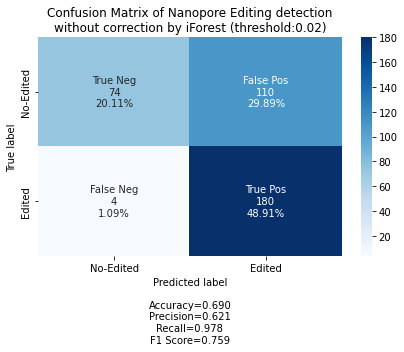

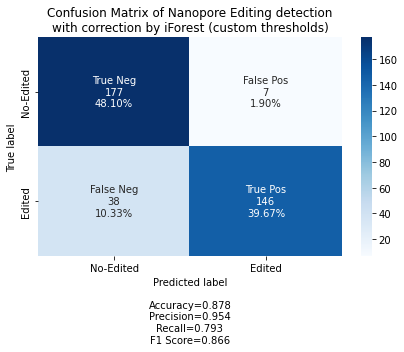

In [13]:
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
categories = ["No-Edited", "Edited"]

# confusion matrices plots
utils.make_confusion_matrix(confusion_matrix(y_illumina, y_hat), 
                      group_names=labels,
                      categories=categories,
                      title = f"Confusion Matrix of Nanopore Editing detection\nwithout correction by iForest (threshold:{freq_threshold})",
                      figsize=(6,5), 
                      path="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/wt_ko/ConfMatrix_wt_vs_ko_NoCorrection.tiff")

utils.make_confusion_matrix(confusion_matrix(y_illumina, y_hat_iForest), 
                      group_names=labels,
                      categories=categories,
                      title = f"Confusion Matrix of Nanopore Editing detection\nwith correction by iForest (custom thresholds)",
                      figsize=(6,5),
                      path="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/wt_ko/ConfMatrix_wt_vs_ko_iForestCorrection.tiff")

### Perform further analysis

In [14]:
(wt_vs_ko_dropped["WT_Tfreq_native"] > freq_threshold).value_counts()

True     180
False      4
Name: WT_Tfreq_native, dtype: int64

In [15]:
(wt_vs_ko_dropped["WT_y_iForest"] == 1).value_counts()

True     146
False     38
Name: WT_y_iForest, dtype: int64

In [16]:
(wt_vs_ko_dropped["KO_Tfreq_native"] > freq_threshold).value_counts()

True     110
False     74
Name: KO_Tfreq_native, dtype: int64

In [17]:
(wt_vs_ko_dropped["KO_y_iForest"] == 1).value_counts()

False    177
True       7
Name: KO_y_iForest, dtype: int64

In [18]:
print(f'Percentage variation of WT edited sites called by nanopore (above theshold) after iForest correction: {round((((wt_vs_ko_dropped["WT_y_iForest"] == 1).value_counts()[True] - (wt_vs_ko_dropped["WT_Tfreq_native"] > freq_threshold).value_counts()[True])/(wt_vs_ko_dropped["WT_Tfreq_native"] > freq_threshold).value_counts()[True]) *100, 2)} %')
print(f'Percentage variation of KO edited sites called by nanopore (above theshold) after iForest correction: {round((((wt_vs_ko_dropped["KO_y_iForest"] == 1).value_counts()[True] - (wt_vs_ko_dropped["KO_Tfreq_native"] > freq_threshold).value_counts()[True])/(wt_vs_ko_dropped["KO_Tfreq_native"] > freq_threshold).value_counts()[True]) *100, 2)} %')

Percentage variation of WT edited sites called by nanopore (above theshold) after iForest correction: -18.89 %
Percentage variation of KO edited sites called by nanopore (above theshold) after iForest correction: -93.64 %


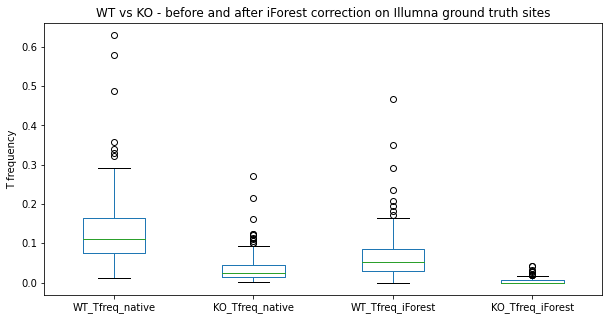

In [19]:
wt_vs_ko_dropped[["WT_Tfreq_native", "KO_Tfreq_native", "WT_Tfreq_iForest", "KO_Tfreq_iForest"]].plot(kind="box", figsize=(10,5))
plt.title("WT vs KO - before and after iForest correction on Illumna ground truth sites")
plt.ylabel("T frequency")
plt.show()

In [20]:
wt_vs_ko_dropped[["WT_Tfreq_native", "KO_Tfreq_native", "WT_Tfreq_iForest", "KO_Tfreq_iForest"]].describe()

,WT_Tfreq_native,KO_Tfreq_native,WT_Tfreq_iForest,KO_Tfreq_iForest
count,184.000000,184.000000,184.000000,184.000000
mean,0.129193,0.036326,0.064146,0.004494
std,0.088395,0.036379,0.059411,0.007462
min,0.010417,0.002037,0.000000,0.000000
25%,0.073938,0.013514,0.029179,0.000000
50%,0.111944,0.024405,0.051403,0.000000
75%,0.163996,0.045559,0.084407,0.007248
max,0.629032,0.271523,0.467433,0.042705


In [21]:
# print the most kwnown edited sites
wt_vs_ko_dropped.query("contig_mm39 == 'chr2'").query("pos_mm39 == 121983221")

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,...,WT_Tfreq_iForest,WT_5mer,WT_y_iForest,KO_T_native,KO_T_iForest,KO_depth_stranded,KO_Tfreq_native,KO_Tfreq_iForest,KO_5mer,KO_y_iForest
74,chr2,121983221,"[0, 2180, 0, 613]",0.22,"[0, 2210, 0, 1]",0.0,UTR3,B2m,chr2,121983221.0,...,0.195065,TACAC,1.0,29.0,2.0,815.0,0.035583,0.002454,TACAC,0.0


In [22]:
wt_vs_ko_dropped.query("contig_mm39 == 'chr2'").query("pos_mm39 == 121983221")[["WT_Tfreq_native", "WT_Tfreq_iForest", "KO_Tfreq_native", "KO_Tfreq_iForest"]]

,WT_Tfreq_native,WT_Tfreq_iForest,KO_Tfreq_native,KO_Tfreq_iForest
74,0.329025,0.195065,0.035583,0.002454


### Print editing frequencies' linear correlation (Spearman) among illumina and wt-ko sites

In [23]:
from scipy.stats import spearmanr

In [24]:
# retrieve illumina frequencies for WT and KO CT substitutions
freq_ed_illumina = wt_vs_ko_dropped.SubsFreq_WT.tolist() + wt_vs_ko_dropped.SubsFreq_KO.tolist()

In [25]:
spearman_native = spearmanr(freq_ed_illumina, freq_ed)

print(f"Spearman correlation illumina ground truth and native nanopore data {round(spearman_native[0], 3)} (p-value: {spearman_native[1]})")

Spearman correlation illumina ground truth and native nanopore data 0.749 (p-value: 2.5712845072938723e-67)


In [26]:
spearman_iForest_corrected = spearmanr(freq_ed_illumina, freq_ed_iForest)

print(f"Spearman correlation illumina ground truth and iForest corrected nanopore data {round(spearman_iForest_corrected[0], 3)} (p-value: {spearman_iForest_corrected[1]})")

Spearman correlation illumina ground truth and iForest corrected nanopore data 0.824 (p-value: 2.101092070715672e-92)


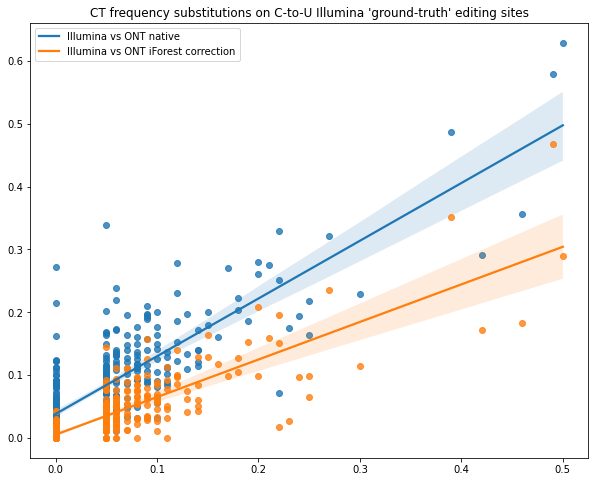

In [27]:
plt.figure(figsize=(10,8))
sn.regplot(x=freq_ed_illumina, y=freq_ed)
sn.regplot(x=freq_ed_illumina, y=freq_ed_iForest)
plt.legend(["Illumina vs ONT native", "Illumina vs ONT iForest correction"])
plt.title("CT frequency substitutions on C-to-U Illumina 'ground-truth' editing sites")
plt.show()